moon型のデータ集合に対し,kNNを適用する。

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9

データの描画。いつもの様に、Xに点の座標、yにクラス分類(この場合は0,1の2種類)が入っている。  
ついでに簡易ヒートマップも重ねる。  
```numpy.linspace(start, end, 要素数)``` 等差数列を生成するが、間隔（公差）ではなく要素数を指定する。  
```subplot(l, c, n)``` このメソッドを使うことで、一つの描画キャンパスを複数の領域に分割して、それぞれのサブ領域でグラフを作成可能。  
l:描画キャンパスの分割数(行)、c:描画キャンパスの分割数(列)、n:グラフを描くのに利用するサブ領域の番号  
```fig, ax = plt.subplots()``` これで、 1つのFigureオブジェクトとそれに属する1つのAxesオブジェクトを同時に作成。初期設定みたいな。  ```contourf()``` 等高線を表すメソッド。contourf(格子点のx座標の配列, 格子点のy座標の配列, 値の配列)

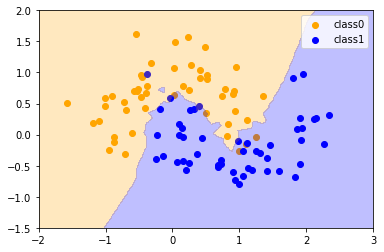

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xmin, xmax = -2.0, 3.0
ymin, ymax = -1.5, 2.0

f0 = np.linspace(xmin, xmax, 400)
f1 = np.linspace(ymin, ymax, 400)
f0, f1 = np.meshgrid(f0, f1)
pred = model.predict(np.vstack([f0.ravel(), f1.ravel()]).T).reshape(f0.shape)

X_orange = X[y==0,:]
X_blue = X[y==1,:]

color0 = "orange"
color1 = "blue"

fig, ax = plt.subplots()
plt.scatter(X_orange[:,0], X_orange[:,1], c = color0, label = "class0")
plt.scatter(X_blue[:,0], X_blue[:,1], c = color1, label = "class1")
ax.contourf(f0, f1, pred, levels=1, colors=[color0, color1], alpha=0.25)
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)
plt.legend()
plt.show()

ヒートマップ作成。

In [51]:
pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

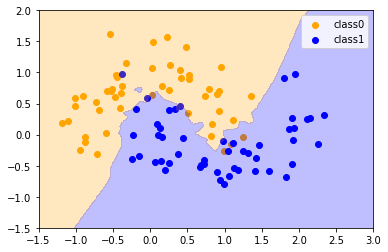

In [45]:
fig

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)